In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import tensorflow as tf

<IPython.core.display.Javascript object>

In [3]:
import tensorflow_datasets as tfds

<IPython.core.display.Javascript object>

In [4]:
tfds.disable_progress_bar()

<IPython.core.display.Javascript object>

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
def normalise(images, labels):
    """
    Normalise the pixel values of a series of images to be in the [0, 1) range.
    """
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

<IPython.core.display.Javascript object>

In [11]:
tdataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
class_names = metadata.features["label"].names
train_dataset, test_dataset = dataset["train"], dataset["test"]
train_dataset = train_dataset.map(normalise).cache()
test_dataset = test_dataset.map(normalise).cache()

<IPython.core.display.Javascript object>

View a selection of pieces of clothing

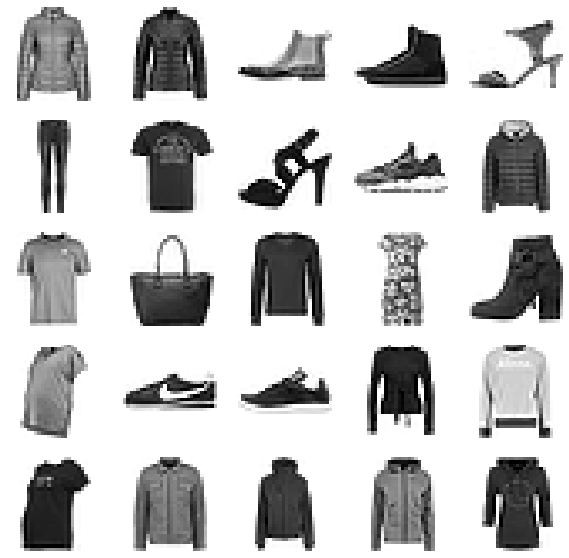

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])

Now build the actual model.
The tutoral mentions that softmax and sparecategoricalcrossentropy are a poor mix, so use the from_logits instead.

In [15]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

<IPython.core.display.Javascript object>

In [16]:
BATCH_SIZE = 32
num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
train_dataset = (
    train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

<IPython.core.display.Javascript object>

In [18]:
model.fit(
    train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)
)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6308 - accuracy: 0.7791
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8579
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3420 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3144 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3051 - accuracy: 0.8891


<IPython.core.display.Javascript object>

In [23]:
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples / 32)
)
print("Accuracy on test dataset:", test_accuracy)
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8692
Accuracy on test dataset: 0.8691999912261963


<IPython.core.display.Javascript object>

In [33]:
def plot_image(i, predictions_array, true_labels, images, ax=None):
    """
    Plot a predicted image against its predicted label.
    """
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(images[i], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_label = np.argmax(predictions_array[i])
    ax.set_xlabel(
        f"{class_names[predicted_label]} {100*np.max(predictions_array[i]):.2f}",
        color="blue" if predicted_label == true_labels[i] else "red",
    )
    return ax

<IPython.core.display.Javascript object>

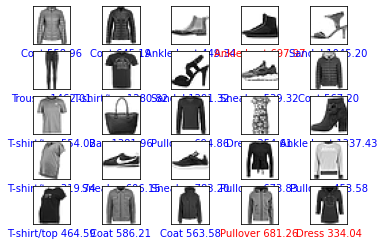

<IPython.core.display.Javascript object>

In [34]:
fig, axes = plt.subplots(5, 5)

for i in range(5):
    for j in range(5):
        plot_image((i * 5) + j, predictions, test_labels, test_images, ax=axes[i, j])

# Exercises


Only one training epoch: accuracy is worse at 84%

In [36]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    train_dataset, epochs=1, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)
)
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples / 32)
)
print("Accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8403
Accuracy on test dataset: 0.8403000235557556


<IPython.core.display.Javascript object>

Different numbers of neurons in the dense layer:
    512: 87.9%
    128: 86.9%
    16: 83.8%
but there is a risk of overfitting / wasting time

In [38]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)
)
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples / 32)
)
print("Accuracy on test dataset:", test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5797 - accuracy: 0.7955
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3713 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3211 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.8878
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3490 - accuracy: 0.8798
Accuracy on test dataset: 0.879800021648407


<IPython.core.display.Javascript object>

In [39]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(10),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)
)
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples / 32)
)
print("Accuracy on test dataset:", test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7747 - accuracy: 0.7312
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4570 - accuracy: 0.8417
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4195 - accuracy: 0.8533
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4031 - accuracy: 0.8610
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.4589 - accuracy: 0.8388
Accuracy on test dataset: 0.8388000130653381


<IPython.core.display.Javascript object>

In [40]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)
)
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples / 32)
)
print("Accuracy on test dataset:", test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6132 - accuracy: 0.7847
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3393 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3141 - accuracy: 0.8837
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3437 - accuracy: 0.8747
Accuracy on test dataset: 0.8747000098228455


<IPython.core.display.Javascript object>